In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

In [21]:
with_mask_files = os.listdir('images/0')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

[' (2316).png', ' (858).png', ' (1393).png', ' (2236).png', ' (2320).png']
[' (884).png', ' (1194).png', ' (420).png', ' (218).png', ' (2335).png']


In [22]:
without_mask_files = os.listdir('images/1')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

[' (858).png', ' (1393).png', ' (1093).png', ' (1360).png', ' (749).png']
[' (420).png', ' (2807).png', ' (218).png', ' (1538).png', ' (2335).png']


In [23]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 2083
Number of without mask images: 2231


In [24]:
with_mask_labels = [1]*2083
without_mask_labels = [0]*2231
print(with_mask_labels[0:5],len(with_mask_labels))
print(without_mask_labels[0:5],len(without_mask_labels))
labels = with_mask_labels + without_mask_labels
print(len(labels))

[1, 1, 1, 1, 1] 2083
[0, 0, 0, 0, 0] 2231
4314


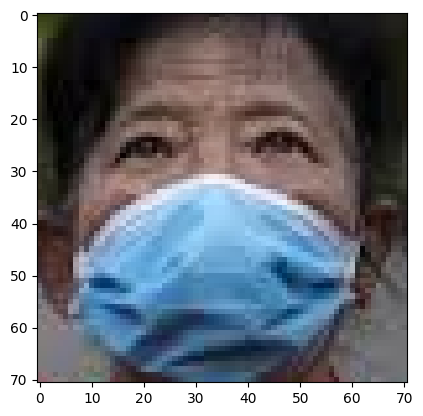

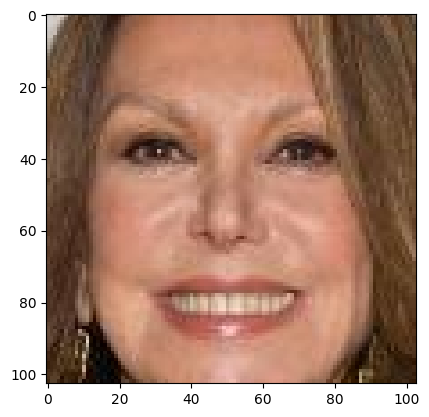

In [25]:
img = mpimg.imread('images/0/ (101).png')
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread('images/1/ (1).png')
imgplot = plt.imshow(img)
plt.show()

In [26]:
with_mask_path = 'images/0/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = 'images/1/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
X = np.array(data)
Y = np.array(labels)
type(X),type(Y)
print(X.shape)
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X.shape, X_train.shape, X_test.shape)

(4314, 128, 128, 3)
(4314,)
(4314, 128, 128, 3) (3235, 128, 128, 3) (1079, 128, 128, 3)


In [33]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

Epoch 1/5
91/91 [==============================] - 83s 897ms/step - loss: 0.3556 - acc: 0.8526 - val_loss: 0.1437 - val_acc: 0.9506
Epoch 2/5
91/91 [==============================] - 79s 866ms/step - loss: 0.1485 - acc: 0.9495 - val_loss: 0.0830 - val_acc: 0.9599
Epoch 3/5
91/91 [==============================] - 80s 879ms/step - loss: 0.0989 - acc: 0.9718 - val_loss: 0.0422 - val_acc: 0.9815
Epoch 4/5
91/91 [==============================] - 77s 843ms/step - loss: 0.0740 - acc: 0.9742 - val_loss: 0.0392 - val_acc: 0.9877
Epoch 5/5
34/34 [==============================] - 8s 237ms/step - loss: 0.0535 - acc: 0.9815
Test Accuracy = 0.9814643263816833


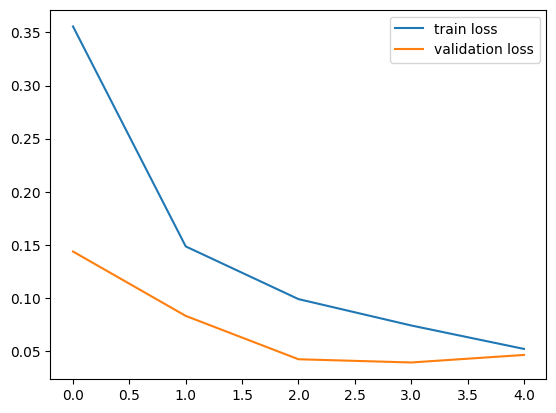

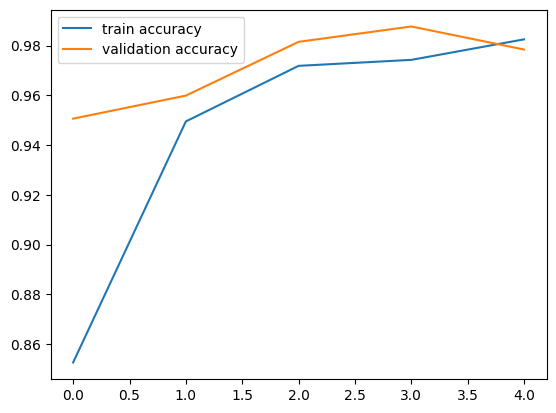

In [34]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

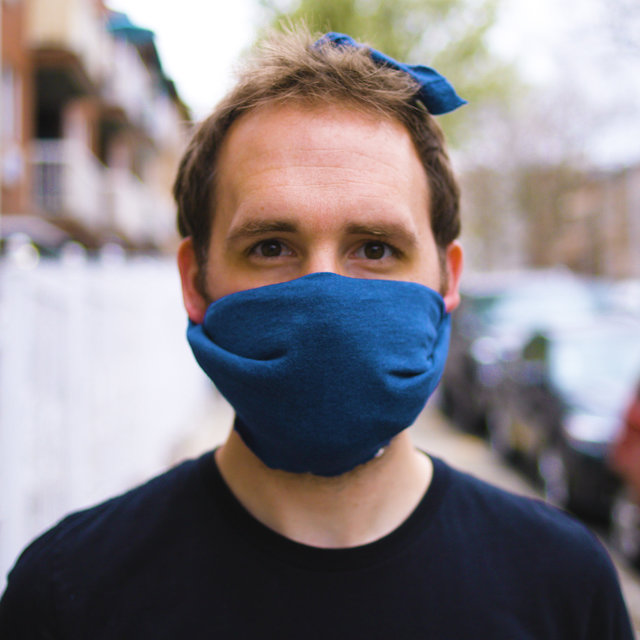

1/1 [==============================] - 0s 121ms/step
[[0.2733968 0.4604359]]
1
The person in the image is wearing a mask


In [35]:
input_image_path = 'images/msk.jpg'
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
   print('The person in the image is wearing a mask')
else:
   print('The person in the image is not wearing a mask')